In [83]:
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.gridspec import GridSpec
plt.rcParams.update({'font.family':'serif'})

In [84]:
import numpy as np 

class LIF():
    I_inj: float = 1e-4
    C_m: float = 5e-7
    R_m: float = 1e6
    V_reset: float = 0.1
    V_0: float = 0.05
    V_th: float = 0.4
    V_init: float = 0

    def __init__(self, I_inj = I_inj, C_m = C_m, R_m = R_m, V_reset = V_reset, V_0 = V_0, V_th = V_th) -> None:
        self.I_inj = I_inj
        self.C_m = C_m
        self.R_m = R_m
        self.V_reset = V_reset
        self.V_0 = V_0
        self.V_th = V_th


    def initial_conditions(self, V_init = V_init) -> None:
        self.V_init = V_init

    def calculate(self, time_interval: float = 0.01, dots: int = 100000) -> tuple:
        self.V = [self.V_init]
        time_array = np.linspace(0, time_interval, dots)
        delta_t = time_array[1] - time_array[0]
        for i in range(dots - 1):
            if self.V[i] >= self.V_th:
                self.V.append(self.V_reset)
            else:
                self.V.append((self.I_inj - (self.V[i] - self.V_0)/self.R_m) * delta_t / self.C_m + self.V[i])
        return time_array, self.V

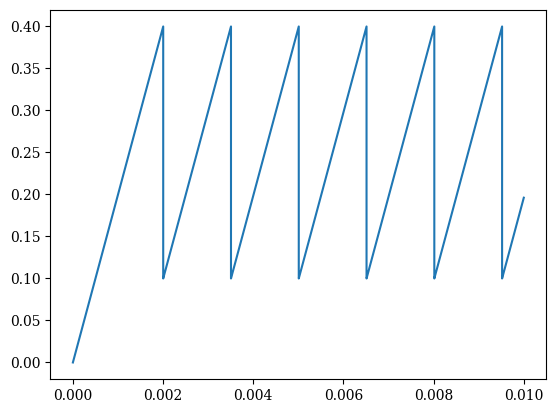

In [85]:
l = LIF()

t, v = l.calculate()

plt.plot(t, v)

In [86]:
l_1 = LIF(I_inj=3e-7, C_m=1e-9)
t_1, v_1 = l_1.calculate()

l_2 = LIF(I_inj=4e-7, C_m=1e-9)
t_2, v_2 = l_2.calculate()

l_3 = LIF(I_inj=5e-7, C_m=1e-9)
t_3, v_3 = l_3.calculate()

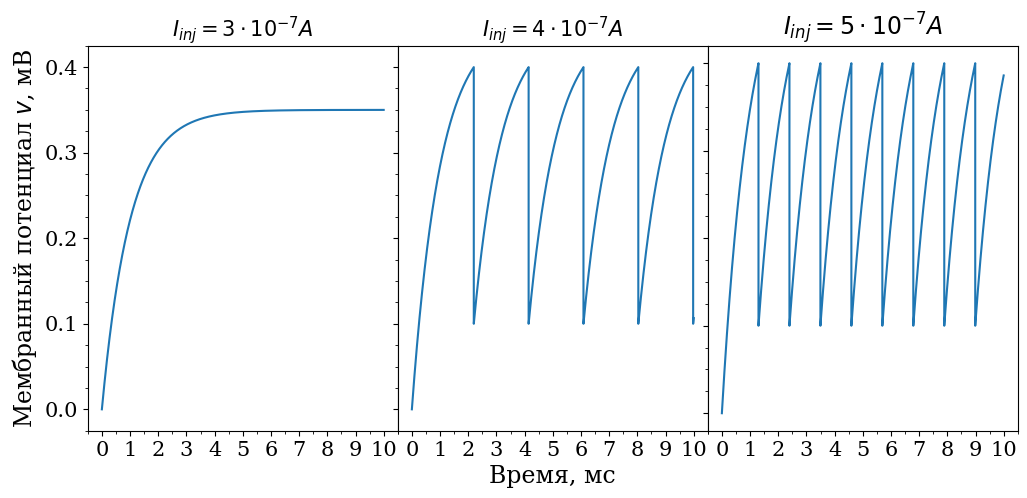

In [ ]:
fig = plt.figure(figsize=(12, 5))
gs = GridSpec(ncols=3, nrows=1, figure=fig)

ax_1 = fig.add_subplot(gs[0])
ax_1.plot(np.array(t_1) * 1000, v_1)
ax_1.tick_params(labelsize=15)
ax_1.set(xlim=[-0.5,10.5], ylim=[-0.025,0.425])
ax_1.set_title(r'$I_{inj} = 3 \cdot 10^{-7} A$', size = 15)
ax_1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax_1.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
ax_1.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax_1.yaxis.set_minor_locator(ticker.MultipleLocator(0.025))
ax_1.set_ylabel(r'Мембранный потенциал $v$, мВ', size = 17)

ax_2 = fig.add_subplot(gs[1])
ax_2.plot(np.array(t_2) * 1000, v_2)
ax_2.tick_params(labelsize=15, labelleft = False)
ax_2.set(xlim=[-0.5,10.5], ylim=[-0.025,0.425])
ax_2.set_title(r'$I_{inj} = 4 \cdot 10^{-7} A$', size = 15)
ax_2.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax_2.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
ax_2.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax_2.yaxis.set_minor_locator(ticker.MultipleLocator(0.025))
ax_2.set_xlabel('Время, мс', size = 17)

ax_3 = fig.add_subplot(gs[2])
ax_3.plot(np.array(t_2) * 1000, v_3)
ax_3.tick_params(labelsize=15, labelleft = False)
ax_1.set(xlim=[-0.5,10.5], ylim=[-0.025,0.425])
ax_3.set_title(r'$I_{inj} = 5 \cdot 10^{-7} A$', size = 17)
ax_3.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax_3.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
ax_3.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax_3.yaxis.set_minor_locator(ticker.MultipleLocator(0.025))

gs.update(wspace=0, hspace = 0)

#plt.savefig('LIF_model.png', dpi = 300, bbox_inches = 'tight')